## Practicing logistic regression

<p>Let's practice using the <i>Logistic Regression</i> with Colacho's salaries</p>

### Import our libraries


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries with formulas we need to use
import statsmodels.formula.api as sm
from sklearn import metrics

### Import our database

In [52]:
defect = pd.read_csv('logistic_regression.csv')

defect.columns

# Removing observation column
# c1 = defect.drop(['Observations'], axis = 1)
# c1.head()
# c1.describe()

Index(['Observations', 'Inspection Time', 'Error Identification'], dtype='object')

### Creating a data frame with python

In [53]:
# Creating our data for the data frame
# observations = np.arange(1, 56)
insp_time = np.random.randint(0, 60, size=55)
# error_ind = np.random.randint(0,2, size=55)
observations = np.arange(1, 56)
# insp_time = np.linspace(0, 60, 55)  # Creating a linearly spaced inspection time
logistic_function = 1 / (1 + np.exp(-(0.1 * (insp_time - 30))))  # Logistic function for probability
error_ind = np.random.binomial(1, logistic_function, size=55)

# Checking our arrys
print(observations, insp_time, error_ind)

# Creating a dictionary to storage our data
my_defect = {
    'Observations': observations,
    'Inspection_Time': insp_time,
    'Error_Identification': error_ind
}

# Creating our data frame
defect_df = pd.DataFrame(my_defect)
defect_df

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55] [47 14  7 13 22 59 56 39 20 15 44 17 46 52 23 25 24 59 59 59 44 40 28 14
 44  0 24  6  8 23  0 43  7 23 10 50 16  7 34 34 32 58  4 41 38 57 40 27
  6  8  7 11 33 32 47] [1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1]


,Observations,Inspection_Time,Error_Identification
0,1,47,1
1,2,14,0
2,3,7,0
3,4,13,0
4,5,22,0
5,6,59,1
6,7,56,1
7,8,39,0
8,9,20,1
9,10,15,0


### Working with our data

In [54]:
c1df = defect_df.drop(['Observations'], axis = 1)
c1df.head()
c1df.describe()

,Inspection_Time,Error_Identification
count,55.000000,55.000000
mean,29.018182,0.436364
std,18.142942,0.500505
min,0.000000,0.000000
25%,13.500000,0.000000
50%,27.000000,0.000000
75%,44.000000,1.000000
max,59.000000,1.000000


### Building our prediction model

In [55]:
# logistic regression model fitting process
logit_model = sm.logit('Error_Identification ~ Inspection_Time', data = c1df).fit()

Optimization terminated successfully.
         Current function value: 0.279234
         Iterations 8


In [56]:
# Summary of our model
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Error_Identification   No. Observations:                   55
Model:                            Logit   Df Residuals:                       53
Method:                             MLE   Df Model:                            1
Date:                  Sun, 17 Dec 2023   Pseudo R-squ.:                  0.5924
Time:                          15:55:52   Log-Likelihood:                -15.358
converged:                         True   LL-Null:                       -37.676
Covariance Type:              nonrobust   LLR p-value:                 2.371e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.8246      1.563     -3.726      0.000      -8.889      -2.760
Inspection_Time     0.1799      0.047      3.849      0.000       0.088       0.272
===================================================================================
"""

In [57]:
# Now is time to make our prediction model
pred = logit_model.predict(c1df['Inspection_Time'])
pred.head(10)


0    0.932908
1    0.035381
2    0.010302
3    0.029728
4    0.133994
5    0.991768
6    0.985959
7    0.767237
8    0.097443
9    0.042062
dtype: float64

Text(0, 0.5, 'Predicted value')

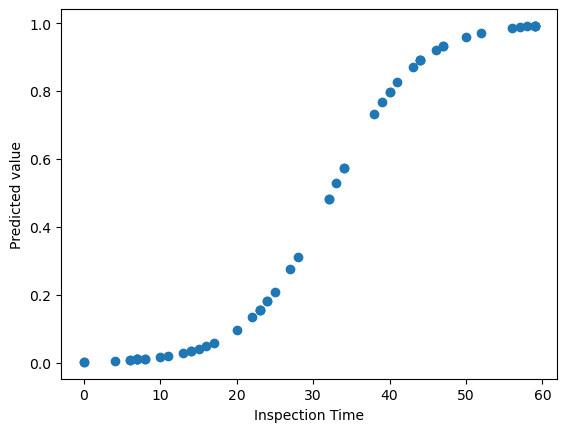

In [61]:
# Visualizing our prediction model with the SIGMOID CURVE
plt.scatter(x = c1df['Inspection_Time'], y = pred)
plt.xlabel('Inspection Time')
plt.ylabel('Predicted value')


#### Test the level of performance of out algorithms

In [64]:
# Converting our probabilities into binary cases, creating a new column
c1df ['pred'] =np.zeros(55)

# Taking a threshold value and above the probability value
# we compare the pred with 0.5
c1df.loc[pred > 0.5, 'pred'] = 1
c1df.head(15)

,Inspection_Time,Error_Identification,pred
0,47,1,1.0
1,14,0,0.0
2,7,0,0.0
3,13,0,0.0
4,22,0,0.0
5,59,1,1.0
6,56,1,1.0
7,39,0,1.0
8,20,1,0.0
9,15,0,0.0


#### Compare if the model is working with the confusion matrix.

In [65]:
# confusion matrix
confusion_matrix = pd.crosstab(c1df['pred'], c1df['Error_Identification'])
confusion_matrix

Error_Identification,0,1
pred,,
0.0,28,3
1.0,3,21


In [66]:
# Accuracy of the model
accuracy = (28 + 21) / (55)
accuracy

0.8909090909090909

In [67]:
# Using a function to measure the accuracy of the model
metrics.accuracy_score(c1df['pred'], c1df['Error_Identification'])

0.8909090909090909